<a href="https://colab.research.google.com/github/Meistermagier/PAP2/blob/master/Experiment_232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bestimmung der Wellenlänge


Wir bestimmen zuerst die Wellenlänge eines Grünen Lasers mithilfe eines Michelson Interferrometer. 

Tabelle 1:

| $s_a$ [mm] | $s_e$ [mm] | $m$ [A.U.] |
|------|------|-----|
|0.0000|2.9645|11089|
|3.2000|0.2400|9538 |
|0.5000|3.4590|10452|
|3.2000|0.2350|11158|
|0.1000|3.0645|11131|

In [0]:
import numpy as np
import matplotlib.pyplot as plt
data_1 = np.genfromtxt('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/Aufgabe1.csv',delimiter =";")
s_e = data_1[:,1]
s_a = data_1[:,0]
dm = data_1[:,2]
wavelength = 2*np.absolute(s_e - s_a)/dm 
print(wavelength)

[0.00053467 0.00062068 0.00056621 0.00053146 0.00053266]


In [0]:
std_wave = np.std(wavelength)

# 2. Bestimmung der Brechungsindex von Luft

# 3. Bestimmung der Kohärenzlänge einer Leuchtdiode

[-0.028, 0.07, -0.077, 0.077]

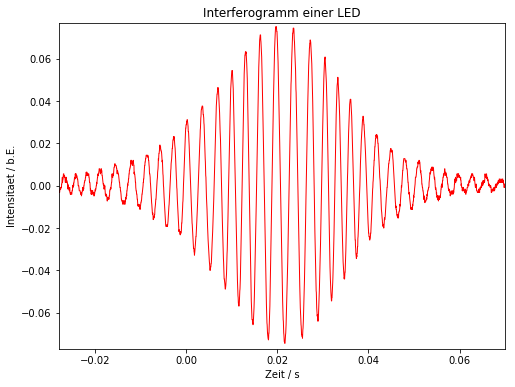

In [0]:
import numpy as np
import matplotlib.pyplot as plt
data_3 = np.genfromtxt ('https://raw.githubusercontent.com/Meistermagier/PAP2/master/Experiment232/F0013CH1.CSV', delimiter=",", skip_header=18)
t = data_3[:,3:4]
t = t[:, 0]
U = data_3[:,4:5]
U = U[:, 0]

plt.figure(figsize=(8,6))
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

[  51  116  181  249  331  429  510  578  657  726  809  896  975 1048
 1128 1214 1311 1407 1482 1553 1624 1693 1767 1850 1917 2003 2074 2141
 2220 2293 2369 2448]


[-0.028, 0.07, -0.077, 0.077]

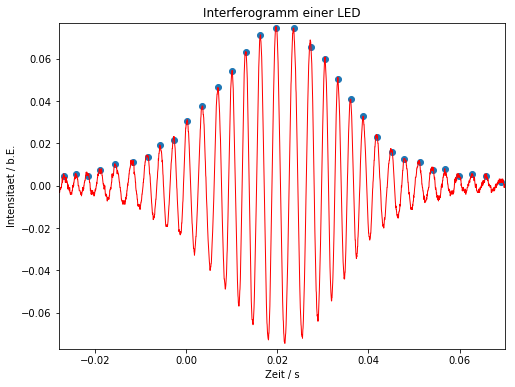

In [0]:
from scipy import signal
peakind = signal.find_peaks_cwt(U, np.arange(1,40), noise_perc=20)
print(peakind)

plt.figure(figsize=(8,6))
plt.plot(t[peakind], U[peakind], marker = 'o', linewidth = 0)
plt.plot(t, U, color = 'red', linewidth = 1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED')
plt.axis([-0.028, 0.07, -0.077, 0.077])

In [0]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
  return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fitFunc, t[peakind], U[peakind])

x = np.linspace(-0.028,0.07,100)
plt.figure(figsize=(8,6))
plt.plot(x, fitFunc(x, *popt))
plt.plot(t[peakind], U[peakind], marker = '*', linewidth = 0)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.title('Interferogramm einer LED (Gaussfit)')
plt.axis([-0.028, 0.07, -0.077, 0.077])
print(*popt)

RuntimeError: ignored